In [4]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,2,3)

df= sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [3]:
df_sg_columns = [c for c in df.columns if c[1].startswith("Sg_")]
df_sg_columns

[(1001, 'Sg_101'),
 (1001, 'Sg_102'),
 (1001, 'Sg_103'),
 (1004, 'Sg_110'),
 (1004, 'Sg_111'),
 (1004, 'Sg_112'),
 (1006, 'Sg_116'),
 (1006, 'Sg_117'),
 (1006, 'Sg_118'),
 (1007, 'Sg_119'),
 (1007, 'Sg_120'),
 (1007, 'Sg_121'),
 (1008, 'Sg_122'),
 (1008, 'Sg_123'),
 (1008, 'Sg_124'),
 (1009, 'Sg_125'),
 (1009, 'Sg_126'),
 (1009, 'Sg_127'),
 (1010, 'Sg_128'),
 (1010, 'Sg_129'),
 (1010, 'Sg_130'),
 (1011, 'Sg_131'),
 (1011, 'Sg_132'),
 (1011, 'Sg_133'),
 (1012, 'Sg_134'),
 (1012, 'Sg_135'),
 (1012, 'Sg_136'),
 (1013, 'Sg_137'),
 (1013, 'Sg_138'),
 (1013, 'Sg_139'),
 (1042, 'Sg_227'),
 (1042, 'Sg_228'),
 (1042, 'Sg_229'),
 (1043, 'Sg_230'),
 (1043, 'Sg_231'),
 (1043, 'Sg_232'),
 (1044, 'Sg_233'),
 (1044, 'Sg_234'),
 (1044, 'Sg_235'),
 (1045, 'Sg_236'),
 (1045, 'Sg_237'),
 (1045, 'Sg_238'),
 (1046, 'Sg_239'),
 (1046, 'Sg_240'),
 (1046, 'Sg_241'),
 (1047, 'Sg_242'),
 (1047, 'Sg_243'),
 (1047, 'Sg_244'),
 (1048, 'Sg_245'),
 (1048, 'Sg_246'),
 (1048, 'Sg_247'),
 (1049, 'Sg_248'),
 (1049, 'Sg_

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [40]:
x = df[df_sg_columns].values.T
y = np.array(list(map(lambda x: x[0], df_sg_columns)))
x.shape, y.shape, y[:5]

((60, 437), (60,), array([1001, 1001, 1001, 1004, 1004]))

In [61]:
samples = list(set(range(0,60))- set(range(0,60,3)))
print(samples)
lda.fit(x[samples,:],y[samples])

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59]


LinearDiscriminantAnalysis(n_components=2)

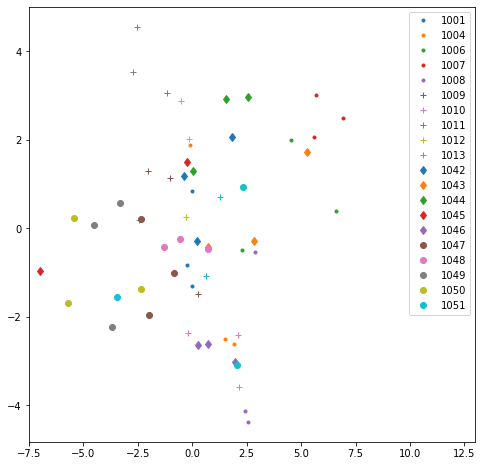

In [78]:
plt.figure(figsize=(8,8))
xx = lda.transform(x)
for a in range(0,60,3):
    plt.plot(xx[a:a+3,0], xx[a:a+3,1],'.+do'[a//15])

#plt.scatter(xx[::3,0],xx[::3,1], s=80, facecolors='none', edgecolors='r')
plt.xlim(-7.5, 13)
plt.legend(list(map(str,y[::3])))

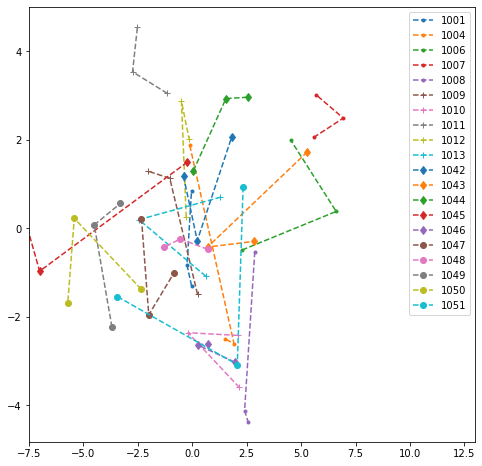

In [79]:
plt.figure(figsize=(8,8))
xx = lda.transform(x)
for a in range(0,60,3):
    plt.plot(xx[a:a+3,0], xx[a:a+3,1],'.+do'[a//15]+'--')

#plt.scatter(xx[::3,0],xx[::3,1], s=80, facecolors='none', edgecolors='r')
plt.xlim(-7.5, 13)
plt.legend(list(map(str,y[::3])))

In [66]:
lda.predict(x[::3])

array([1048, 1012, 1043, 1007, 1043, 1043, 1046, 1042, 1042, 1013, 1049,
       1006, 1044, 1043, 1010, 1047, 1051, 1047, 1048, 1048])

In [48]:
from sklearn.decomposition import PCA
pca = PCA(2)

td = pca.fit_transform(x)

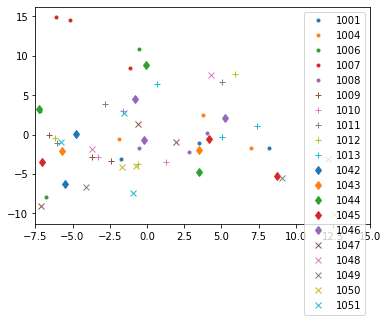

In [50]:
for a in range(0,60,3):
    plt.plot(td[a:a+3,0], td[a:a+3,1],'.+dx'[a//15])

plt.xlim(-7.5, 15)
plt.legend(list(map(str,y[::3])))

In [27]:
lda.get_params()

{'n_components': 2,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}